In [1]:
import pandas as pd
import numpy as np

### Note TV: Files are read, columns are renamed, additional column with source name is added (for all 16 files)

In [2]:
list_of_all_files = ['bbchealth.txt','cbchealth.txt', 'cnnhealth.txt', 'everydayhealth.txt',
                     'foxnewshealth.txt','gdnhealthcare.txt', 'goodhealth.txt', 'KaiserHealthNews.txt',
                     'latimeshealth.txt','msnhealthnews.txt', 'NBChealth.txt', 'nprhealth.txt',
                     'nytimeshealth.txt','reuters_health.txt', 'usnewshealth.txt', 'wsjhealth.txt']
df_lists = []

In [3]:
for filename in list_of_all_files:
    #print(filename)
    DataFileName = filename.split('.', 1)[0]
    #print(DataFileName)
    DataFrame = pd.read_csv(filename, delimiter='|', error_bad_lines=False, warn_bad_lines=False, header=None)
    DataFrame.rename(columns = {0:'Number', 1:'Date_Time',2:'info'}, inplace = True)
    DataFrame['source'] = pd.Series([DataFileName for x in range(len(DataFrame.index))])
    df_lists.append(DataFrame)
print('Reading all files is done !')

Reading all files is done !


### Note TV: Merging files

In [4]:
twitter_health = pd.concat(df_lists, axis=0)

In [5]:
twitter_health

,Number,Date_Time,info,source
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...
3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


In [20]:
twitter_health['source'].value_counts()

goodhealth          7708
nytimeshealth       5947
nprhealth           4837
reuters_health      4719
NBChealth           4215
latimeshealth       4171
cnnhealth           4045
bbchealth           3929
cbchealth           3728
KaiserHealthNews    3508
everydayhealth      3239
wsjhealth           3200
msnhealthnews       3199
gdnhealthcare       2977
foxnewshealth       2000
usnewshealth        1395
Name: source, dtype: int64

In [6]:
for file in df_lists:
    print('File name:', file['source'].unique(), len(file))

File name: ['bbchealth'] 3929
File name: ['cbchealth'] 3728
File name: ['cnnhealth'] 4045
File name: ['everydayhealth'] 3239
File name: ['foxnewshealth'] 2000
File name: ['gdnhealthcare'] 2977
File name: ['goodhealth'] 7708
File name: ['KaiserHealthNews'] 3508
File name: ['latimeshealth'] 4171
File name: ['msnhealthnews'] 3199
File name: ['NBChealth'] 4215
File name: ['nprhealth'] 4837
File name: ['nytimeshealth'] 5947
File name: ['reuters_health'] 4719
File name: ['usnewshealth'] 1395
File name: ['wsjhealth'] 3200


### Reseting index

In [7]:
twitter_health=twitter_health.reset_index()

In [8]:
twitter_health

,index,Number,Date_Time,info,source
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


### "info" column can be splitted on "http" due to the fact that core text is on the beginning of the cell and the info after are redundant and unuseful, however there are 119 rows of the "info column which start with "http" and we need to take care of them first in order not to lose data from this 119 rows

### File comprised from the 119 rows which start with "http" in the "info" column is the following:

In [9]:
#df[df["lot"].str.startswith("A-0")]
split_exceptions = twitter_health[twitter_health['info'].str.startswith("http")]
split_exceptions

,index,Number,Date_Time,info,source
19543,2602,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare
25536,5618,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth
25683,5765,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth
26351,6433,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth
26353,6435,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth
...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth


In [10]:
rows_to_skip = split_exceptions.index
rows_to_skip

Int64Index([19543, 25536, 25683, 26351, 26353, 26367, 26415, 26439, 26444,
            26446,
            ...
            54888, 55210, 55674, 59848, 59956, 59957, 60379, 60394, 60465,
            62206],
           dtype='int64', length=119)

### File without the 119 rows which start with "http" in the "info" column is the following:

In [11]:
file_to_split = twitter_health.drop((rows_to_skip), axis=0)
file_to_split

,index,Number,Date_Time,info,source
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


In [12]:
62817 - 119

62698

In [13]:
file_to_split_check =  file_to_split[file_to_split['info'].str.startswith("http")]
file_to_split_check

,index,Number,Date_Time,info,source


### Dataframe status 

In [14]:
#rows which start with 'http:'' excluded - 119 rows excluded
file_to_split

,index,Number,Date_Time,info,source
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


In [15]:
#rows which begin with http: to be excluded from file splitting below
split_exceptions

,index,Number,Date_Time,info,source
19543,2602,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare
25536,5618,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth
25683,5765,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth
26351,6433,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth
26353,6435,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth
...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth


## Dealing with the 119 rows with "http" on the beginning

In [16]:
split_exceptions['info']

19543                             http://gu.com/p/438n2/tw
25536    http://pinterest.com/pin/34832597089912501/ Br...
25683    http://pinterest.com/pin/34832597089793116/ We...
26351    http://pinterest.com/pin/34832597088302332/ 7 ...
26353    http://pinterest.com/pin/34832597088298094/ 5 ...
                               ...                        
59957    http://HealthCare.gov Expected to Work Better ...
60379    http://HealthCare.gov Shortens Insurance Appli...
60394    http://HealthCare.gov Testing to Be Confidenti...
60465    http://HealthCare.gov Delays Web Host Switch h...
62206    http://HealthCare.Gov Plans Deadline Leeway ht...
Name: info, Length: 119, dtype: object

### splitting column "info" from dataset "split_exeptions" by delimiter ' '

In [17]:
split_exceptions_splitted = split_exceptions['info'].str.split(" ", n=1, expand=True)

In [18]:
split_exceptions_splitted.rename(columns = {0:'redundant_info', 1:'Core_info'}, inplace = True)
split_exceptions_splitted

,redundant_info,Core_info
19543,http://gu.com/p/438n2/tw,None
25536,http://pinterest.com/pin/34832597089912501/,Brooke Burke Charvet: 8 Things You Should Know...
25683,http://pinterest.com/pin/34832597089793116/,Weight Loss Tip: Peel Off Pudge With Pepper
26351,http://pinterest.com/pin/34832597088302332/,7 Foods That Help You Shed Pounds
26353,http://pinterest.com/pin/34832597088298094/,5 Healthy Cinco de Mayo Recipes
...,...,...
59957,http://HealthCare.gov,Expected to Work Better This Year http://on.ws...
60379,http://HealthCare.gov,Shortens Insurance Application http://on.wsj.c...
60394,http://HealthCare.gov,Testing to Be Confidential http://on.wsj.com/1...
60465,http://HealthCare.gov,Delays Web Host Switch http://on.wsj.com/1rKuiWc


In [19]:
split_exceptions_splitted = split_exceptions_splitted.drop(['redundant_info'], axis=1)
split_exceptions_splitted

,Core_info
19543,None
25536,Brooke Burke Charvet: 8 Things You Should Know...
25683,Weight Loss Tip: Peel Off Pudge With Pepper
26351,7 Foods That Help You Shed Pounds
26353,5 Healthy Cinco de Mayo Recipes
...,...
59957,Expected to Work Better This Year http://on.ws...
60379,Shortens Insurance Application http://on.wsj.c...
60394,Testing to Be Confidential http://on.wsj.com/1...
60465,Delays Web Host Switch http://on.wsj.com/1rKuiWc


In [20]:
exceptions = pd.concat([split_exceptions, split_exceptions_splitted], axis = 1)
exceptions

,index,Number,Date_Time,info,source,Core_info
19543,2602,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare,None
25536,5618,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth,Brooke Burke Charvet: 8 Things You Should Know...
25683,5765,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth,Weight Loss Tip: Peel Off Pudge With Pepper
26351,6433,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth,7 Foods That Help You Shed Pounds
26353,6435,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth,5 Healthy Cinco de Mayo Recipes
...,...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year http://on.ws...
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application http://on.wsj.c...
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential http://on.wsj.com/1...
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch http://on.wsj.com/1rKuiWc


### Preparing core dataframe "file_to_split" to be merged with dataframe "exeptions"

In [21]:
file_to_split

,index,Number,Date_Time,info,source
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


In [22]:
file_to_split['Core_info'] = file_to_split['info']

In [23]:
file_to_split

,index,Number,Date_Time,info,source,Core_info
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised http://bbc.in/...
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll http://bbc...
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater' http://bbc...
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising' http://bb...
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors http://bb...
...,...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth,RT @stefaniei: Addiction and the brain: scient...
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth,RT @timothywmartin: Ho-ho-hold up! A surprise ...
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth,RT @stefaniei: Health-Insurance Deadline Exten...
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth,Boston Scientific Eyes China Expansion http://...


In [24]:
display(file_to_split)
display(exceptions)

,index,Number,Date_Time,info,source,Core_info
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised http://bbc.in/...
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll http://bbc...
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater' http://bbc...
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising' http://bb...
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors http://bb...
...,...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth,RT @stefaniei: Addiction and the brain: scient...
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth,RT @timothywmartin: Ho-ho-hold up! A surprise ...
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth,RT @stefaniei: Health-Insurance Deadline Exten...
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth,Boston Scientific Eyes China Expansion http://...


,index,Number,Date_Time,info,source,Core_info
19543,2602,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare,None
25536,5618,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth,Brooke Burke Charvet: 8 Things You Should Know...
25683,5765,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth,Weight Loss Tip: Peel Off Pudge With Pepper
26351,6433,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth,7 Foods That Help You Shed Pounds
26353,6435,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth,5 Healthy Cinco de Mayo Recipes
...,...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year http://on.ws...
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application http://on.wsj.c...
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential http://on.wsj.com/1...
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch http://on.wsj.com/1rKuiWc


### Merging back the full file - after taking care of the "http" on the beginnig of the cell in the column "Core_info"

In [25]:
file_for_split_full = pd.concat([file_to_split, exceptions], axis = 0)
file_for_split_full

,index,Number,Date_Time,info,source,Core_info
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised http://bbc.in/...
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll http://bbc...
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater' http://bbc...
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising' http://bb...
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors http://bb...
...,...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year http://on.ws...
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application http://on.wsj.c...
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential http://on.wsj.com/1...
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch http://on.wsj.com/1rKuiWc


#### this file is cleared from "http" on the beginning of the cell within the "Core_info" column and can be splitted further on the "http" 

### Splitting  the column "Core_info" of the entire dataset of 62817 rows on "http"

In [26]:
Core_info_split = file_for_split_full['Core_info'].str.split("http", n=1, expand=True)
Core_info_split

,0,1
0,Breast cancer risk test devised,://bbc.in/1CimpJF
1,GP workload harming care - BMA poll,://bbc.in/1ChTBRv
2,Short people's 'heart risk greater',://bbc.in/1ChTANp
3,New approach against HIV 'promising',://bbc.in/1E6jAjt
4,Coalition 'undermined NHS' - doctors,://bbc.in/1CnLwK7
...,...,...
59957,Expected to Work Better This Year,://on.wsj.com/117yaGw
60379,Shortens Insurance Application,://on.wsj.com/1sdfGyR
60394,Testing to Be Confidential,://on.wsj.com/1BPftTH
60465,Delays Web Host Switch,://on.wsj.com/1rKuiWc


In [27]:
Core_info_split.rename(columns = {0:'Core_info_final', 1:'redundant_info'}, inplace = True)
Core_info_split

,Core_info_final,redundant_info
0,Breast cancer risk test devised,://bbc.in/1CimpJF
1,GP workload harming care - BMA poll,://bbc.in/1ChTBRv
2,Short people's 'heart risk greater',://bbc.in/1ChTANp
3,New approach against HIV 'promising',://bbc.in/1E6jAjt
4,Coalition 'undermined NHS' - doctors,://bbc.in/1CnLwK7
...,...,...
59957,Expected to Work Better This Year,://on.wsj.com/117yaGw
60379,Shortens Insurance Application,://on.wsj.com/1sdfGyR
60394,Testing to Be Confidential,://on.wsj.com/1BPftTH
60465,Delays Web Host Switch,://on.wsj.com/1rKuiWc


### Adding the splitted Core_info column to the entire dataset

In [28]:
file_for_split_full
Core_info_split

,Core_info_final,redundant_info
0,Breast cancer risk test devised,://bbc.in/1CimpJF
1,GP workload harming care - BMA poll,://bbc.in/1ChTBRv
2,Short people's 'heart risk greater',://bbc.in/1ChTANp
3,New approach against HIV 'promising',://bbc.in/1E6jAjt
4,Coalition 'undermined NHS' - doctors,://bbc.in/1CnLwK7
...,...,...
59957,Expected to Work Better This Year,://on.wsj.com/117yaGw
60379,Shortens Insurance Application,://on.wsj.com/1sdfGyR
60394,Testing to Be Confidential,://on.wsj.com/1BPftTH
60465,Delays Web Host Switch,://on.wsj.com/1rKuiWc


In [29]:
twitter_full = pd.concat([file_for_split_full, Core_info_split], axis = 1)

In [30]:
twitter_full

,index,Number,Date_Time,info,source,Core_info,Core_info_final,redundant_info
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised http://bbc.in/...,Breast cancer risk test devised,://bbc.in/1CimpJF
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll http://bbc...,GP workload harming care - BMA poll,://bbc.in/1ChTBRv
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater' http://bbc...,Short people's 'heart risk greater',://bbc.in/1ChTANp
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising' http://bb...,New approach against HIV 'promising',://bbc.in/1E6jAjt
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors http://bb...,Coalition 'undermined NHS' - doctors,://bbc.in/1CnLwK7
...,...,...,...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year http://on.ws...,Expected to Work Better This Year,://on.wsj.com/117yaGw
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application http://on.wsj.c...,Shortens Insurance Application,://on.wsj.com/1sdfGyR
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential http://on.wsj.com/1...,Testing to Be Confidential,://on.wsj.com/1BPftTH
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch http://on.wsj.com/1rKuiWc,Delays Web Host Switch,://on.wsj.com/1rKuiWc


In [31]:
twitter_health = twitter_full.drop(['Core_info', 'index', "redundant_info"], axis = 1)

In [32]:
twitter_health

,Number,Date_Time,info,source,Core_info_final
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater'
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising'
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors
...,...,...,...,...,...
59957,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year
60379,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application
60394,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential
60465,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch


In [33]:
print('----Split check-----')
print('  ')
print('Before split:')
print(file_to_split['info'][3929])
print('---------------')
print('After split split:')
print(twitter_full['Core_info_final'][3929])
print(twitter_full['redundant_info'][3929])

----Split check-----
  
Before split:
Drugs need careful monitoring for expiry dates, pharmacists say http://www.cbc.ca/news/health/drugs-need-careful-monitoring-for-expiry-dates-pharmacists-say-1.3026749?cmp=rss
---------------
After split split:
Drugs need careful monitoring for expiry dates, pharmacists say 
://www.cbc.ca/news/health/drugs-need-careful-monitoring-for-expiry-dates-pharmacists-say-1.3026749?cmp=rss


In [34]:
#file_to_split_new = file_to_split_full.drop(['redundant_info'], axis=1)
#file_to_split_new

### Check for rows wich start with "http:"

In [35]:
twitter_health[twitter_health['info'].str.startswith("http")]

,Number,Date_Time,info,source,Core_info_final
19543,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare,None
25536,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth,Brooke Burke Charvet: 8 Things You Should Know...
25683,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth,Weight Loss Tip: Peel Off Pudge With Pepper
26351,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth,7 Foods That Help You Shed Pounds
26353,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth,5 Healthy Cinco de Mayo Recipes
...,...,...,...,...,...
59957,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year
60379,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application
60394,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential
60465,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch


# File to work with from now on:

In [36]:
twitter_health

,Number,Date_Time,info,source,Core_info_final
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater'
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising'
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors
...,...,...,...,...,...
59957,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year
60379,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application
60394,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential
60465,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch


#### columns "Number" and "info" are to be deleted later

#### columns "Date_Time" needs to be splitted, and column "Core_info_final" to be tokenized etc.

In [37]:
from datetime import date

In [38]:
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
twitter_health['Date_Time'] = pd.to_datetime(twitter_health['Date_Time'], errors='coerce')

In [39]:
twitter_health['year'] = twitter_health['Date_Time'].dt.year
twitter_health['month'] = twitter_health['Date_Time'].dt.month
twitter_health['day'] = twitter_health['Date_Time'].dt.day
twitter_health['date'] = twitter_health['Date_Time'].dt.date

In [40]:
twitter_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62817 entries, 0 to 62206
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Number           62817 non-null  int64              
 1   Date_Time        62817 non-null  datetime64[ns, UTC]
 2   info             62817 non-null  object             
 3   source           62817 non-null  object             
 4   Core_info_final  62816 non-null  object             
 5   year             62817 non-null  int64              
 6   month            62817 non-null  int64              
 7   day              62817 non-null  int64              
 8   date             62817 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 6.8+ MB


In [41]:
twitter_health['date'] = pd.to_datetime(twitter_health['date'], errors='coerce')

In [42]:
twitter_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62817 entries, 0 to 62206
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Number           62817 non-null  int64              
 1   Date_Time        62817 non-null  datetime64[ns, UTC]
 2   info             62817 non-null  object             
 3   source           62817 non-null  object             
 4   Core_info_final  62816 non-null  object             
 5   year             62817 non-null  int64              
 6   month            62817 non-null  int64              
 7   day              62817 non-null  int64              
 8   date             62817 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(4), object(3)
memory usage: 6.8+ MB


In [43]:
twitter_health['day_of_week'] = twitter_health['date'].apply(lambda time: time.dayofweek)

In [44]:
twitter_health

,Number,Date_Time,info,source,Core_info_final,year,month,day,date,day_of_week
0,585978391360221184,2015-04-09 01:31:50+00:00,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised,2015,4,9,2015-04-09,3
1,585947808772960257,2015-04-08 23:30:18+00:00,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll,2015,4,8,2015-04-08,2
2,585947807816650752,2015-04-08 23:30:18+00:00,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater',2015,4,8,2015-04-08,2
3,585866060991078401,2015-04-08 18:05:28+00:00,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising',2015,4,8,2015-04-08,2
4,585794106170839041,2015-04-08 13:19:33+00:00,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors,2015,4,8,2015-04-08,2
...,...,...,...,...,...,...,...,...,...,...
59957,533426053901860864,2014-11-15 01:07:36+00:00,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year,2014,11,15,2014-11-15,5
60379,520007777175879680,2014-10-09 00:28:10+00:00,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application,2014,10,9,2014-10-09,3
60394,519674939507359745,2014-10-08 02:25:35+00:00,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential,2014,10,8,2014-10-08,2
60465,517514080131629056,2014-10-02 03:19:06+00:00,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch,2014,10,2,2014-10-02,3


In [45]:
twitter_health['day_of_week'].value_counts()

3    12257
1    11690
2    11569
0    10550
4    10329
5     3779
6     2643
Name: day_of_week, dtype: int64

### Conclusion: Most of the tweets are released during workweek (3 to 4 times more on weekday than during weekend days)

In [46]:
#twitter_health.info()

In [47]:
#twitter_health["day_of_week"] = twitter_health["day_of_week"].map({0: '1-Monday',1: '2-Tuesday', 2: '3-Wednesday', 3: '4-Thursday', 4: '5-Friday', 5: '6-Saturday', 6: '7-Sunday' })

### renaming days of the week

In [48]:
#twitter_health.head(5)

In [49]:
twitter_weekdays = twitter_health['day_of_week'].value_counts()
df_weekdays = pd.DataFrame(data=twitter_weekdays)
df_weekdays['Weekday'] = df_weekdays.index
df_weekdays.sort_values('Weekday')

,day_of_week,Weekday
0,10550,0
1,11690,1
2,11569,2
3,12257,3
4,10329,4
5,3779,5
6,2643,6


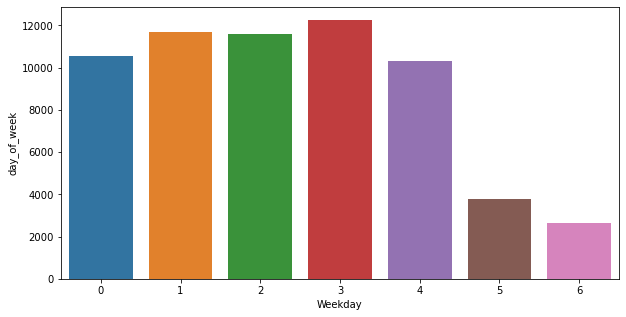

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,5))
sns.barplot(y ='day_of_week', x = 'Weekday', data = df_weekdays)
plt.show()

In [51]:
weekly_by_source = twitter_health.groupby(['source', 'day_of_week']).count()

In [52]:
#weekly_by_source

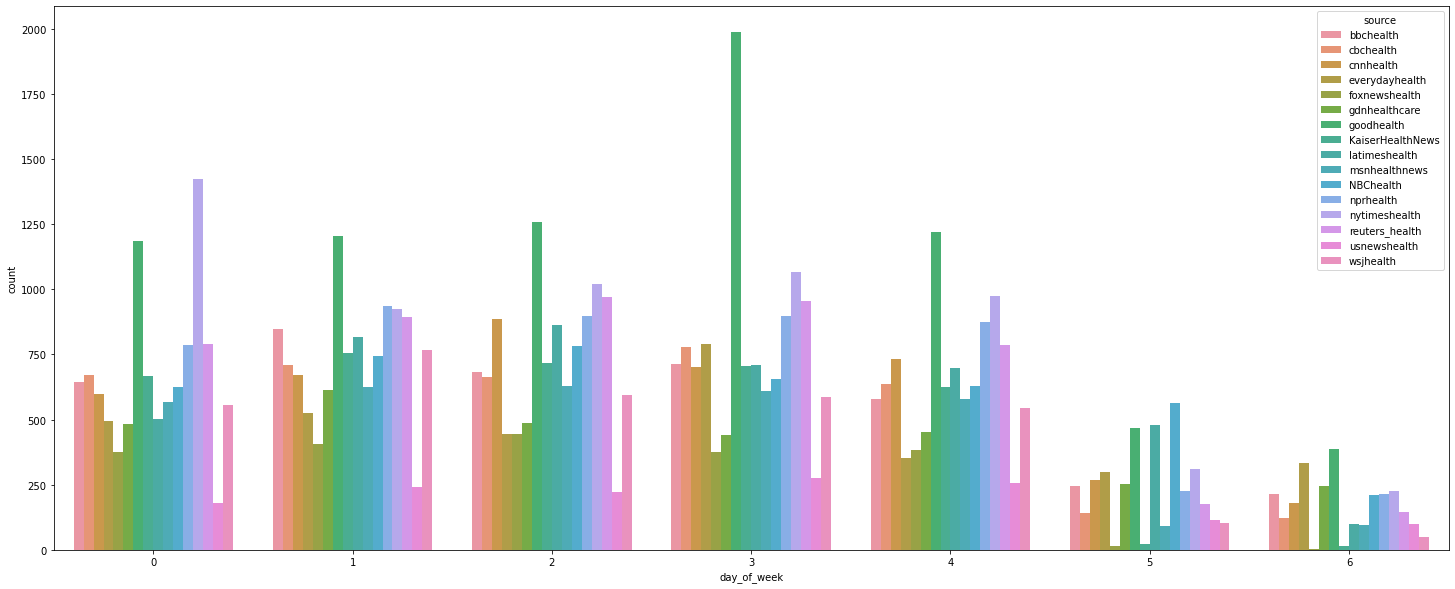

In [53]:
plt.figure(figsize = (25,10))
sns.countplot(x ='day_of_week', hue = "source", data = twitter_health)
plt.show()

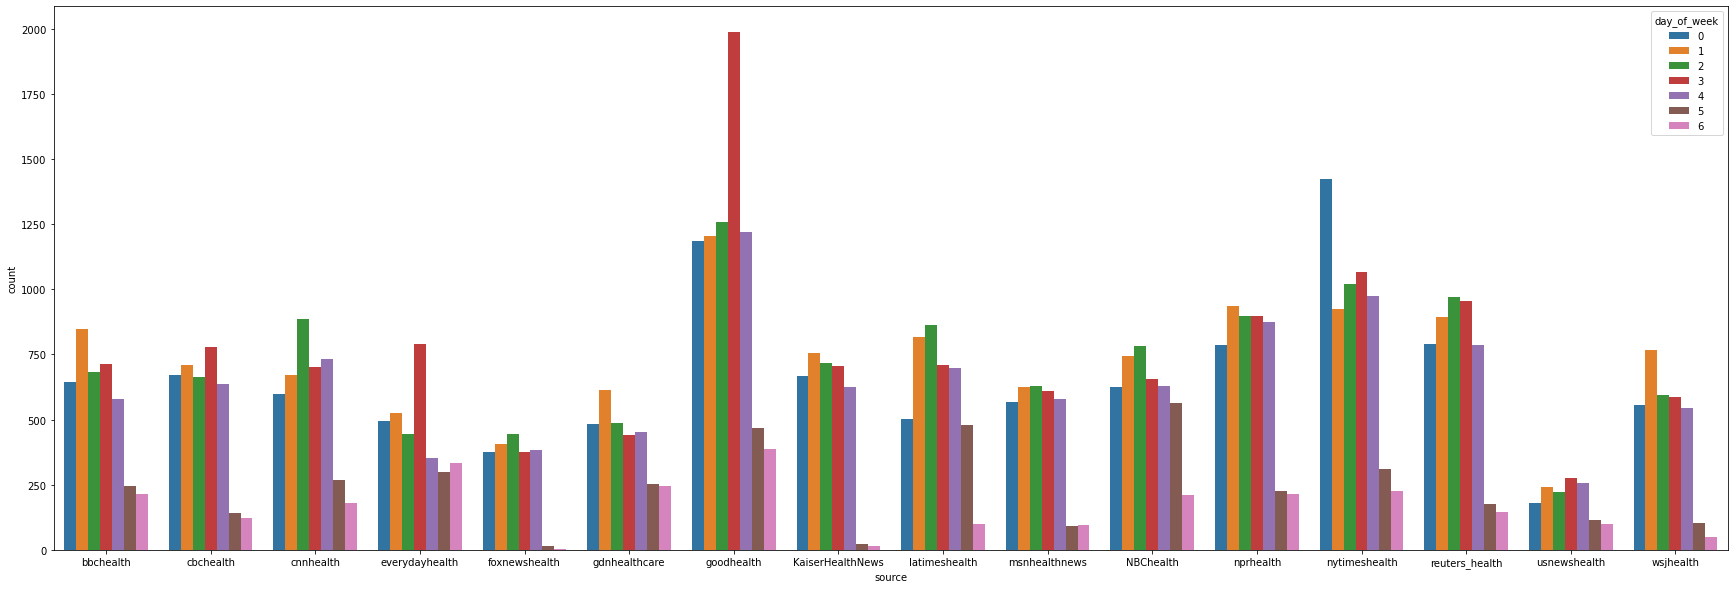

In [54]:
plt.figure(figsize = (30,10))
sns.countplot(x ='source', hue = "day_of_week", data = twitter_health)
plt.show()

# Dataset with data ready to be tokenized etc. in the column "Core_info_final"

### Columns "Number", "Date_Time", and "info" can be deleted 

In [55]:
twitter_health

,Number,Date_Time,info,source,Core_info_final,year,month,day,date,day_of_week
0,585978391360221184,2015-04-09 01:31:50+00:00,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised,2015,4,9,2015-04-09,3
1,585947808772960257,2015-04-08 23:30:18+00:00,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll,2015,4,8,2015-04-08,2
2,585947807816650752,2015-04-08 23:30:18+00:00,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater',2015,4,8,2015-04-08,2
3,585866060991078401,2015-04-08 18:05:28+00:00,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising',2015,4,8,2015-04-08,2
4,585794106170839041,2015-04-08 13:19:33+00:00,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors,2015,4,8,2015-04-08,2
...,...,...,...,...,...,...,...,...,...,...
59957,533426053901860864,2014-11-15 01:07:36+00:00,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year,2014,11,15,2014-11-15,5
60379,520007777175879680,2014-10-09 00:28:10+00:00,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application,2014,10,9,2014-10-09,3
60394,519674939507359745,2014-10-08 02:25:35+00:00,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential,2014,10,8,2014-10-08,2
60465,517514080131629056,2014-10-02 03:19:06+00:00,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch,2014,10,2,2014-10-02,3


In [56]:
twitter_health.loc[twitter_health['Core_info_final'].isna()]


,Number,Date_Time,info,source,Core_info_final,year,month,day,date,day_of_week
19543,532856398615674880,2014-11-13 11:24:00+00:00,http://gu.com/p/438n2/tw,gdnhealthcare,None,2014,11,13,2014-11-13,3


In [57]:
twitter_health.dropna(subset=['Core_info_final'], inplace=True)

In [58]:
twitter_health.shape

(62816, 10)

In [60]:
import string
import nltk
nltk.download('punkt')
from string import punctuation
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\todor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### to list for further processing

In [62]:
col_list = twitter_health.Core_info_final.values.tolist()
#print(col_list)
print(len(col_list))
print(col_list [:10])
col_list[0] += "52"
#strip, trgnuva prazni mesta

62816
['Breast cancer risk test devised ', 'GP workload harming care - BMA poll ', "Short people's 'heart risk greater' ", "New approach against HIV 'promising' ", "Coalition 'undermined NHS' - doctors ", 'Review of case against NHS manager ', "VIDEO: 'All day is empty, what am I going to do?' ", "VIDEO: 'Overhaul needed' for end-of-life care ", "Care for dying 'needs overhaul' ", 'VIDEO: NHS: Labour and Tory key policies ']


In [63]:
new_list = []

for s in col_list:
    tmp = ""
    for el in s:
        if el in string.printable and el not in string.digits and el not in string.punctuation:
                tmp += el
    if len(tmp) > 0:
        new_list.append(tmp.strip().lower())

In [64]:
col_list = new_list

In [66]:
print(new_list[:10])
print(col_list[:10])

['breast cancer risk test devised', 'gp workload harming care  bma poll', 'short peoples heart risk greater', 'new approach against hiv promising', 'coalition undermined nhs  doctors', 'review of case against nhs manager', 'video all day is empty what am i going to do', 'video overhaul needed for endoflife care', 'care for dying needs overhaul', 'video nhs labour and tory key policies']
['breast cancer risk test devised', 'gp workload harming care  bma poll', 'short peoples heart risk greater', 'new approach against hiv promising', 'coalition undermined nhs  doctors', 'review of case against nhs manager', 'video all day is empty what am i going to do', 'video overhaul needed for endoflife care', 'care for dying needs overhaul', 'video nhs labour and tory key policies']


## DALI TREBA DA GI TRGNEME PRAZNITE MESTA t.e space-ovite?

In [67]:
#To remove the empty strings:
#x = [s for s in x if s]

In [68]:
#for sentence in col_list:
#    col_list_splited = sentence.split()
#    print (col_list_splited)

In [69]:
import nltk  # natural language toolkit
#import spacy
import re # regular expressions?
import pandas as pd
from string import punctuation
from nltk.tokenize import WordPunctTokenizer, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\todor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\todor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\todor\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [70]:
#for el in col_list:
#   print(el)
#    print(tokenizer.tokenize(el))

In [71]:
tokenizer = WordPunctTokenizer()

In [72]:
 #TOKENIZATION

col_list_tokenized = [tokenizer.tokenize(el) for el in col_list]
print('col_list tokenized:', col_list_tokenized[:10])
#col_list = WordPunctTokenizer().tokenize(col_list)
print('-------')
print('col_list:',col_list[:10])
print(len(col_list))

col_list tokenized: [['breast', 'cancer', 'risk', 'test', 'devised'], ['gp', 'workload', 'harming', 'care', 'bma', 'poll'], ['short', 'peoples', 'heart', 'risk', 'greater'], ['new', 'approach', 'against', 'hiv', 'promising'], ['coalition', 'undermined', 'nhs', 'doctors'], ['review', 'of', 'case', 'against', 'nhs', 'manager'], ['video', 'all', 'day', 'is', 'empty', 'what', 'am', 'i', 'going', 'to', 'do'], ['video', 'overhaul', 'needed', 'for', 'endoflife', 'care'], ['care', 'for', 'dying', 'needs', 'overhaul'], ['video', 'nhs', 'labour', 'and', 'tory', 'key', 'policies']]
-------
col_list: ['breast cancer risk test devised', 'gp workload harming care  bma poll', 'short peoples heart risk greater', 'new approach against hiv promising', 'coalition undermined nhs  doctors', 'review of case against nhs manager', 'video all day is empty what am i going to do', 'video overhaul needed for endoflife care', 'care for dying needs overhaul', 'video nhs labour and tory key policies']
62816


In [73]:
# Part-of-speech tagging (POS tagging)

In [74]:
col_list_postagged = nltk.pos_tag_sents(col_list_tokenized)
#print(col_list_postagged[:10])

In [75]:
col_list_postagged[:2]

[[('breast', 'NN'),
  ('cancer', 'NN'),
  ('risk', 'NN'),
  ('test', 'NN'),
  ('devised', 'VBD')],
 [('gp', 'NN'),
  ('workload', 'NN'),
  ('harming', 'VBG'),
  ('care', 'NN'),
  ('bma', 'NN'),
  ('poll', 'NN')]]

In [76]:
col_list_postagged[0][0]

('breast', 'NN')

In [77]:
col_list_postagged[0][0][0]

'breast'

In [78]:
col_list_postagged[0][0][1]

'NN'

In [79]:
def get_minimal_pos_tag(raw_tag: str ) -> str:
  if raw_tag.startswith("N"):
    return 'n'
  if raw_tag.startswith("V"):
    return 'v'
  if raw_tag.startswith("J"):
    return 'a'
  return None

In [80]:
WordNetLemmatizer().lemmatize(col_list_postagged[0][0][0],  pos=get_minimal_pos_tag(col_list_postagged[0][0][1]))

'breast'

In [81]:
# list_of_lists = []
# #list_of_lists.append(a)
# #list_of_lists.append(b)

In [82]:
type(col_list_postagged)
col_list_postagged[1]

[('gp', 'NN'),
 ('workload', 'NN'),
 ('harming', 'VBG'),
 ('care', 'NN'),
 ('bma', 'NN'),
 ('poll', 'NN')]

In [83]:
# list_of_lists = [item for t in col_list_postagged for item in t]

In [84]:
list_tweets = []
for el in col_list_postagged:
    tweet = []
    for i in el:
        if get_minimal_pos_tag(i[1]) is not None:
            t = WordNetLemmatizer().lemmatize(i[0],pos=get_minimal_pos_tag(i[1]))  
            tweet.append(t)
        else:
            t = WordNetLemmatizer().lemmatize(i[0])
            tweet.append(t)
    list_tweets.append(tweet)

In [85]:
display(list_tweets[:10])

[['breast', 'cancer', 'risk', 'test', 'devise'],
 ['gp', 'workload', 'harm', 'care', 'bma', 'poll'],
 ['short', 'people', 'heart', 'risk', 'great'],
 ['new', 'approach', 'against', 'hiv', 'promising'],
 ['coalition', 'undermine', 'nhs', 'doctor'],
 ['review', 'of', 'case', 'against', 'nh', 'manager'],
 ['video', 'all', 'day', 'be', 'empty', 'what', 'be', 'i', 'go', 'to', 'do'],
 ['video', 'overhaul', 'need', 'for', 'endoflife', 'care'],
 ['care', 'for', 'die', 'need', 'overhaul'],
 ['video', 'nh', 'labour', 'and', 'tory', 'key', 'policy']]

In [86]:
print(col_list[:2])
print(list_tweets[:2])

['breast cancer risk test devised', 'gp workload harming care  bma poll']
[['breast', 'cancer', 'risk', 'test', 'devise'], ['gp', 'workload', 'harm', 'care', 'bma', 'poll']]


In [87]:
stop_words1 = stopwords.words('english') 
# KE TREBA DA GI PROSIRIME EXTENDED STOPWORDS
stop_words1.extend(['video', 'audio', 'rt','u', 'health', 'hospital', 'amp', 'patient', 'help', 'doctor', 'care', 'people', '�', '’', '…', 'drug']) # case ask well woman

list_cleaned_stopwords = []
for el in list_tweets:
    single_tweet = []
    for i in el:
        if i not in stop_words1:
            single_tweet.append(i)
        else:
            continue
    list_cleaned_stopwords.append(single_tweet)

In [88]:
display(list_cleaned_stopwords[:10])

[['breast', 'cancer', 'risk', 'test', 'devise'],
 ['gp', 'workload', 'harm', 'bma', 'poll'],
 ['short', 'heart', 'risk', 'great'],
 ['new', 'approach', 'hiv', 'promising'],
 ['coalition', 'undermine', 'nhs'],
 ['review', 'case', 'nh', 'manager'],
 ['day', 'empty', 'go'],
 ['overhaul', 'need', 'endoflife'],
 ['die', 'need', 'overhaul'],
 ['nh', 'labour', 'tory', 'key', 'policy']]

In [89]:
# preporaka od Gorjan za redosled na cekori:
#  - removal na punctuations
#  - tokenizacija
#  - part of speach
#  - lematizacija
#  - stop words
#DONE

In [90]:
# return to list of strings(previously it was list of lists)
# CountVectorizer ili TFidf....
# clustering (prethodno vizuelizacija zaradi hint za klasteriranjeto)

In [91]:
# return to list of strings(previously it was list of lists)
list_of_strings = []
for element in list_cleaned_stopwords:  
    str1 = "" 
    for ele in element:
        str1 += ele + ' '
    list_of_strings.append(str1.strip())
print(list_of_strings[:10])

['breast cancer risk test devise', 'gp workload harm bma poll', 'short heart risk great', 'new approach hiv promising', 'coalition undermine nhs', 'review case nh manager', 'day empty go', 'overhaul need endoflife', 'die need overhaul', 'nh labour tory key policy']


In [92]:
len(list_of_strings)

62816

In [93]:
# from string import punctuation
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [301]:
# # COUNT VECTORIZER
# BoWVect = CountVectorizer(
#                           ngram_range=(1,3),
#                           analyzer='word',
#                           strip_accents = 'unicode',
#                           min_df=15
#                          )
# X_BoW = BoWVect.fit_transform(list_of_strings)
# X_BoW

In [302]:
# X_BoW[0].toarray()[0][751]

In [303]:
# list_of_strings[1]

In [304]:
# X_BoW[1].toarray()[0][2229]

In [305]:
# X_BoW[0]

In [94]:
list_of_strings[0]

'breast cancer risk test devise'

In [95]:
# BoWVect.vocabulary_

# da gi prebroime zborovite

In [96]:
joint_phrases = ""
for phrase in list_of_strings:
    joint_phrases += " " + phrase
word_count_df = pd.DataFrame(pd.DataFrame(joint_phrases.split(" ")).value_counts(), columns=['cnt'], dtype=str).reset_index().rename(columns={0:'words'})
#word_count_df = word_count_df.loc[(~word_count_df['words'].str.strip().isin(stop_words)) & (~word_count_df['words'].str.strip().isin(list(punctuation)))]
pd.options.display.max_rows=100
print(word_count_df.iloc[:100, :])

          words   cnt
0         ebola  4189
1           new  3606
2           say  3274
3         study  3143
4           may  3090
5           get  2972
6        cancer  2365
7          find  1898
8          make  1817
9          risk  1813
10         food  1786
11         well  1548
12         good  1461
13       report  1319
14        woman  1303
15      healthy  1290
16          way  1271
17        today  1268
18          one  1248
19          kid  1236
20        heart  1222
21          day  1215
22         need  1203
23        could  1180
24          use  1162
25         work  1157
26         year  1133
27          eat  1109
28         dont  1085
29          try  1079
30         take  1061
31         life  1031
32         case  1025
33         test  1015
34        death  1005
35            q  1005
36         know   999
37         plan   997
38           go   997
39         time   995
40          fda   988
41       weight   975
42         like   933
43      disease   926
44        

In [97]:
word_count_df

,words,cnt
0,ebola,4189
1,new,3606
2,say,3274
3,study,3143
4,may,3090
...,...,...
28033,janefonda,1
28034,janethelms,1
28035,janetsnell,1
28036,janeway,1


### K means using bag of words

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words = stop_words1 + list(punctuation),
                            ngram_range=(1,3),
                            analyzer='word',
                            strip_accents = 'unicode',
                            min_df=100
                            )
bow = count_vect.fit_transform(list_of_strings)
bow.shape

(62816, 942)

In [101]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names()

In [102]:
#first 10 columns generated by BOW
terms[1:10]

['abortion',
 'abuse',
 'aca',
 'access',
 'act',
 'action',
 'activity',
 'actually',
 'ad']

In [103]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', random_state=99)
model.fit(bow)

#n_jobs =-1,

KMeans(n_clusters=10, random_state=99)

In [104]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [105]:
cluster_center

array([[0.00159872, 0.00479616, 0.00719424, ..., 0.00239808, 0.00319744,
        0.00079936],
       [0.00417184, 0.00492063, 0.00258868, ..., 0.00836507, 0.0017757 ,
        0.00145479],
       [0.00644122, 0.00080515, 0.00322061, ..., 0.00483092, 0.00080515,
        0.00483092],
       ...,
       [0.00035971, 0.00179856, 0.0028777 , ..., 0.00431655, 0.00143885,
        0.00107914],
       [0.        , 0.        , 0.        , ..., 0.00566572, 0.00377715,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01652893, 0.        ,
        0.00063573]])

In [106]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [107]:
# which tells us that clusters are far away from each other 
silhouette_score

0.057319625980413125

In [108]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: report
 say
 new
 find
 medicare
 insurance
 state
 obamacare
 case
 philgalewitz
Cluster 1: study
 new
 say
 cancer
 find
 make
 well
 risk
 good
 woman
Cluster 2: stefaniei
 via
 come
 new
 say
 law
 week
 cancer
 study
 go
Cluster 3: today
 cartoon
 today cartoon
 headline
 tip
 getfit
 today getfit
 today getfit tip
 today headline
 getfit tip
Cluster 4: old
 new
 age
 old age
 new old age
 new old
 blog
 age blog
 old age blog
 home
Cluster 5: ebola
 say
 outbreak
 case
 africa
 liberia
 ebola outbreak
 leone
 sierra
 sierra leone
Cluster 6: get
 new
 way
 weve
 dont
 say
 weve get
 one
 workout
 healthy
Cluster 7: may
 study
 risk
 cancer
 new
 say
 kid
 brain
 find
 good
Cluster 8: heart
 risk
 disease
 heart disease
 attack
 heart attack
 study
 may
 woman
 link
Cluster 9: food
 eat
 healthy
 cynthiasass
 safety
 new
 best
 goodhealth
 bad
 cynthiasass goodhealth


### K means using TFIDF

In [117]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
                            stop_words = stop_words1 + list(punctuation),
                            ngram_range=(1,3),
                            analyzer='word',
                            strip_accents = 'unicode',
                            min_df=75
                            )
tfidf = tfidf_vect.fit_transform(list_of_strings)
tfidf.shape

(62816, 1199)

In [118]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, random_state=99)
model_tf.fit(tfidf)

KMeans(n_clusters=10, random_state=99)

In [119]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [120]:
cluster_center_tf

array([[0.00016966, 0.00029391, 0.00010013, ..., 0.00980718, 0.00013651,
        0.00155164],
       [0.00252293, 0.00094493, 0.00261947, ..., 0.00303074, 0.00082827,
        0.00054897],
       [0.        , 0.        , 0.00204493, ..., 0.0016809 , 0.0016872 ,
        0.        ],
       ...,
       [0.00199712, 0.00023608, 0.0004669 , ..., 0.00310906, 0.00086983,
        0.00087374],
       [0.        , 0.        , 0.        , ..., 0.00103305, 0.00026449,
        0.0010734 ],
       [0.        , 0.        , 0.        , ..., 0.00026422, 0.00028298,
        0.00014962]])

In [121]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names()

In [122]:
terms1[1:10]

['ab',
 'abortion',
 'abuse',
 'aca',
 'access',
 'accord',
 'act',
 'action',
 'active']

In [123]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [124]:
silhouette_score_tf

0.0151254269102691

In [125]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: food
 make
 healthy
 eat
 weight
 cynthiasass
 goodhealth
 cynthiasass goodhealth
 lose
 lose weight
Cluster 1: well
 report
 today
 work
 good
 need
 try
 day
 way
 woman
Cluster 2: study
 study find
 find
 study say
 say
 new study
 new
 link
 study show
 show
Cluster 3: risk
 may
 heart
 raise
 high
 study
 cancer
 increase
 cancer risk
 link
Cluster 4: may
 study
 kid
 brain
 good
 heart
 sleep
 new
 well
 disease
Cluster 5: say
 ebola
 expert say
 cdc
 cdc say
 expert
 report
 need
 official
 new
Cluster 6: get
 new
 way
 new york
 york
 fda
 rule
 food
 insurance
 today
Cluster 7: year
 look
 age
 old
 new
 old age
 new old
 new old age
 age blog
 old age blog
Cluster 8: cancer
 breast
 breast cancer
 prostate
 prostate cancer
 may
 treatment
 study
 woman
 lung cancer
Cluster 9: ebola
 liberia
 outbreak
 ebola outbreak
 africa
 case
 leone
 sierra
 sierra leone
 ebola case


### Processed text column and clusters in DataFrame - based on K means clustering using TFIDF

In [126]:
list_of_strings[:10]

['breast cancer risk test devise',
 'gp workload harm bma poll',
 'short heart risk great',
 'new approach hiv promising',
 'coalition undermine nhs',
 'review case nh manager',
 'day empty go',
 'overhaul need endoflife',
 'die need overhaul',
 'nh labour tory key policy']

In [127]:
# processed text column from list of strings to list of lists
list_of_list_clusters = []

for element in list_of_strings:
    list_1 = []
    list_1.append(element)
    list_of_list_clusters.append(list_1)
    list_1 = []
print(list_of_list_clusters[:10])

[['breast cancer risk test devise'], ['gp workload harm bma poll'], ['short heart risk great'], ['new approach hiv promising'], ['coalition undermine nhs'], ['review case nh manager'], ['day empty go'], ['overhaul need endoflife'], ['die need overhaul'], ['nh labour tory key policy']]


In [128]:
len(labels_tf)

62816

In [129]:
labels = labels_tf.tolist()
type(labels[0])

int

In [130]:
labels[:10]

[8, 1, 3, 6, 1, 1, 1, 1, 1, 1]

In [131]:
# processed clusters label from list of integers to list of lists
list_of_lists_labels = []

for element in labels:
    list_1 = []
    list_1.append(element)
    list_of_lists_labels.append(list_1)
    list_1 = []
print(list_of_lists_labels[:10])

[[8], [1], [3], [6], [1], [1], [1], [1], [1], [1]]


In [132]:
tweets_clustered = pd.DataFrame(list_of_list_clusters)
tweets_clustered.rename(columns = {0:'Tweets_cleaned'}, inplace = True)
tweets_clustered[:10]

,Tweets_cleaned
0,breast cancer risk test devise
1,gp workload harm bma poll
2,short heart risk great
3,new approach hiv promising
4,coalition undermine nhs
5,review case nh manager
6,day empty go
7,overhaul need endoflife
8,die need overhaul
9,nh labour tory key policy


In [133]:
clusters = pd.DataFrame(list_of_lists_labels)
clusters.rename(columns = {0:'Cluster_labels'}, inplace = True)
clusters[:10]

,Cluster_labels
0,8
1,1
2,3
3,6
4,1
5,1
6,1
7,1
8,1
9,1


In [134]:
# merging text column and clusters lables
text_clusters = pd.concat([tweets_clustered,clusters], axis=1)

In [135]:
text_clusters

,Tweets_cleaned,Cluster_labels
0,breast cancer risk test devise,8
1,gp workload harm bma poll,1
2,short heart risk great,3
3,new approach hiv promising,6
4,coalition undermine nhs,1
...,...,...
62811,expect work better year,7
62812,shortens insurance application,1
62813,test confidential,1
62814,delay web host switch,1


# merge with the initial dataframe twitter_health

In [136]:
# cheking the lenght before merge
print('Initial DataFrame shape:', twitter_health.shape)
print('Text and clusters lables DataFrame shape:', text_clusters.shape)
assert len(twitter_health) == len(text_clusters)

Initial DataFrame shape: (62816, 10)
Text and clusters lables DataFrame shape: (62816, 2)


In [137]:
tweets_clustered = pd.concat([twitter_health, text_clusters], axis=1)

# clustered DATAFRAME for further tweets analysis

In [138]:
tweets_clustered[:10]

,Number,Date_Time,info,source,Core_info_final,year,month,day,date,day_of_week,Tweets_cleaned,Cluster_labels
0,5.859784e+17,2015-04-09 01:31:50+00:00,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised,2015.0,4.0,9.0,2015-04-09,3.0,breast cancer risk test devise,8.0
1,5.859478e+17,2015-04-08 23:30:18+00:00,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll,2015.0,4.0,8.0,2015-04-08,2.0,gp workload harm bma poll,1.0
2,5.859478e+17,2015-04-08 23:30:18+00:00,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater',2015.0,4.0,8.0,2015-04-08,2.0,short heart risk great,3.0
3,5.858661e+17,2015-04-08 18:05:28+00:00,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising',2015.0,4.0,8.0,2015-04-08,2.0,new approach hiv promising,6.0
4,5.857941e+17,2015-04-08 13:19:33+00:00,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors,2015.0,4.0,8.0,2015-04-08,2.0,coalition undermine nhs,1.0
5,5.857335e+17,2015-04-08 09:18:39+00:00,Review of case against NHS manager http://bbc....,bbchealth,Review of case against NHS manager,2015.0,4.0,8.0,2015-04-08,2.0,review case nh manager,1.0
6,5.857335e+17,2015-04-08 09:18:39+00:00,"VIDEO: 'All day is empty, what am I going to d...",bbchealth,"VIDEO: 'All day is empty, what am I going to d...",2015.0,4.0,8.0,2015-04-08,2.0,day empty go,1.0
7,5.857016e+17,2015-04-08 07:11:58+00:00,VIDEO: 'Overhaul needed' for end-of-life care ...,bbchealth,VIDEO: 'Overhaul needed' for end-of-life care,2015.0,4.0,8.0,2015-04-08,2.0,overhaul need endoflife,1.0
8,5.856208e+17,2015-04-08 01:51:00+00:00,Care for dying 'needs overhaul' http://bbc.in/...,bbchealth,Care for dying 'needs overhaul',2015.0,4.0,8.0,2015-04-08,2.0,die need overhaul,1.0
9,5.854373e+17,2015-04-07 13:41:42+00:00,VIDEO: NHS: Labour and Tory key policies http:...,bbchealth,VIDEO: NHS: Labour and Tory key policies,2015.0,4.0,7.0,2015-04-07,1.0,nh labour tory key policy,1.0


## OVA NADOLU TREBA DA SE DORABOTI

### K Means CLustering for Avg word to vectors¶

In [139]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_strings: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

<ipython-input-139-21245dbbf37b>:12: RuntimeWarning: invalid value encountered in true_divide
  sent_vec /= cnt_words


(62816, 100)

In [140]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

<ipython-input-141-553d89eb0e23>:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
<ipython-input-141-553d89eb0e23>:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
<ipython-input-141-553d89eb0e23>:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
<ipython-input-141-553d89eb0e23>:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
<ipython-input-141-553d89eb0e23>:6: ConvergenceWarning: 

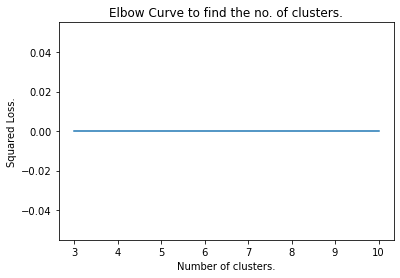

The optimal number of clusters obtained is -  2
The loss for optimal cluster is -  0.0


In [141]:
# Choosing the best cluster using Elbow Method.
# source credit,few parts of min squred loss info is taken from different parts of the stakoverflow answers.
# this is used to understand to find the optimal clusters in differen way rather than used in BOW, TFIDF
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

### Clustering DBSCAN

In [142]:
from sklearn.cluster import DBSCAN

In [143]:
# Computing 20th Nearest neighbour distance
minPts = 2 * 10
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute20thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 20 and dists[19] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 20 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[19] # Dist 199 contains the distance of 200th nearest neighbour.

In [144]:
df = pd.DataFrame(list_of_strings)

In [145]:
#df

In [146]:
# # Computing the 20th nearest neighbour distance of some point the dataset:
# twohundrethneigh = []
# for val in df[:100]:
#     twohundrethneigh.append( compute20thnearestneighbour(val, df[:100]) )
# twohundrethneigh.sort()